# Prueba 2 Simulación 
## Introducción a la Comunicaciones
## Profesor: Jaime Anguita
### Joaquín Barrientos
19.889.690-K


Partimos importando las librerias que debemos utilizar para esta simulación.

In [107]:
import random
import matplotlib.pyplot as plt
import numpy as np

## Pregunta 1

Ahora generamos secuencia de números aleatorios binarios equiprobables usando una semilla aleatoria equivalente al número RUT.

In [108]:
random.seed(198896900)

Luego generamos el vector con los numeros aleatorios de tamaño $N = 10^5$ simbolos.

In [109]:
N = 10**5
bits = []
for i in range(N):
    bits.append(random.randint(0,1))

## Pregunta 2
### OOK

Se procedió a modular en $On-Off$  $keying$ la secuencia generada en la pregunta anterior, pero primero se generó la matriz de ceros para añadir los valores posteriormente. 




In [110]:
ook = np.zeros((N,8))

Se moduló la señal  y se ingresan los valores correspondientes. Para esta codificación se presentan dos posibilidades, que sea 0 o 1. La secuencia tendrá 8*N elementos, con 8 muestras por periodo de bit. 

Por lo tanto si es 0, se rellena un una de las filas de largo de 8, con ceros.
En el otro caso, se rellena la fila con 1.

Para efectos de poder hacer una revisión de los resultados, se deja en matriz las codificaciones.

Lo anterior se puede apreciar en el siguiente código:

In [111]:
 
 for i in range(len(bits)):
    if bits[i] == 0:
        ook[i] = np.array([0.0 for i in range(8)])
    else:
        ook[i] = np.array([1.0 for i in range(8)])


Para poder graficar esto, debemos convertirlo en un solo vector:

In [112]:
ook_vector = []

for i in range(len(ook)):
    for q in range(len(ook[i])):
        ook_vector.append(ook[i][q])

Se graficó las primeras 2000 muestras a continuación:

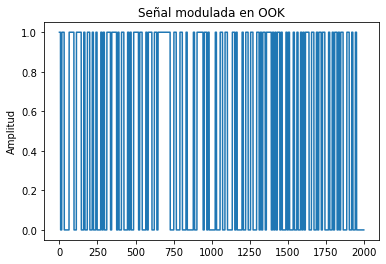

In [113]:

plt.title("Señal modulada en OOK")
plt.ylabel("Amplitud")
plt.plot(range(len(ook_vector[:2000])),ook_vector[:2000])
plt.show()

## Pregunta 3
### NRZ

Se procedió a modular en $Non$ $return-to-zero$ la secuencia generada en la pregunta número 1, pero antres se generó la matriz de ceros para añadir los valores posteriormente. 


In [114]:
nrz = np.zeros((N,8))

Se moduló la señal  y se ingresan los valores correspondientes. Para esta codificación se presentan dos posibilidades, que sea $-1$ o $1$. La secuencia tendrá $8*N$ elementos, con 8 muestras por periodo de bit. 

Por lo tanto si es $"0"$, se rellena un una de las filas de largo de 8, con -1.
En el otro caso, se rellena la fila con 1.

Lo anterior se puede apreciar en el siguiente código:

In [115]:
for i in range(len(bits)):
    if bits[i] == 0:
        nrz[i] = np.array([-1.0 for i in range(8)])
    else:
        nrz[i] = np.array([1.0 for i in range(8)])


Para poder graficar esto, debemos convertirlo en un solo vector:

In [116]:
nrz_vector = []

for i in range(len(nrz)):
    for q in range(len(nrz[i])):
        nrz_vector.append(nrz[i][q])

Se graficó las primeras 2000 muestras a continuación:

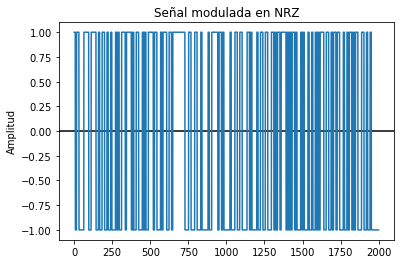

In [117]:
plt.title("Señal modulada en NRZ")
plt.ylabel("Amplitud")
plt.axhline(y=0, color='k')
plt.plot(range(len(nrz_vector[:2000])),nrz_vector[:2000])
plt.show()

## Pregunta 4
### Modulación PPM binaria 

Se moduló nuevamente la secuencia de la pregunta N°1, pero esta vez con $PPM$ $binaria$, donde el $"0"$, se simboliza mediante una fila en la matriz de largo 8, rellenada con $"1"$ en las muestras 0 a 3 del periodo y el resto $"0"$. 

El $"1"$ se simboliza mediante una fila en la matriz  de largo 8, rellenada con $"1"$ en las muestras 4 a 7 del periodo, el resto son $"0"$ en esta fila. 

Primero se procedió a realizar la matriz.

In [118]:
bppm = np.zeros((N,8))

En este paso se rellena la matriz dependiendo del valor de la secuencia

In [119]:
for i in range(len(bits)):
    if bits[i] == 0:
        bppm[i] = np.array([1.0 if i <= 3 else 0.0 for i in range(8)])
    else:
         bppm[i] = np.array([0 if i <= 3 else 1 for i in range(8)])
bppm

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

Para poder graficar esto, debemos convertirlo en un solo vector:

In [120]:
bppm_vector = []

for i in range(len(bppm)):
    for q in range(len(bppm[i])):
        bppm_vector.append(bppm[i][q])


Se graficó las primeras 700 muestras a continuación:

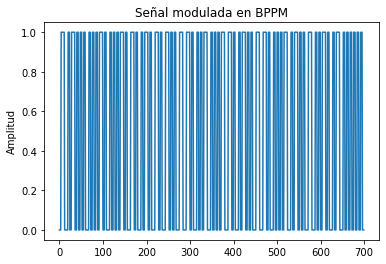

In [121]:
plt.title("Señal modulada en BPPM")
plt.ylabel("Amplitud")

plt.plot(range(len(bppm_vector[:700])),bppm_vector[:700])
plt.show()

## Pregunta 5 
 Se debe determinar el coeficiente de escalamiento de amplitud para cada modulación, como datos obtenemos:


In [122]:
Eb = 1
T = 1

## OOK
Para esta modulación el promedio de energía por bit es $E_{b} = \frac{A^2T}{2}$

In [123]:
A_ook = np.sqrt((2.0*Eb)/T)


Se genera el escalamiento

In [124]:
 for i in range(len(bits)):
    if bits[i] == 0:
        ook[i] = np.array([0.0 for i in range(8)])
    else:
        ook[i] = np.array([1.0*A_ook for i in range(8)])

Nuevamente para graficar se convirtió en un solo vector:

In [125]:
ook_vector = []

for i in range(len(ook)):
    for q in range(len(ook[i])):
        ook_vector.append(ook[i][q])

Se graficó las primeras 2000 muestras a continuación:

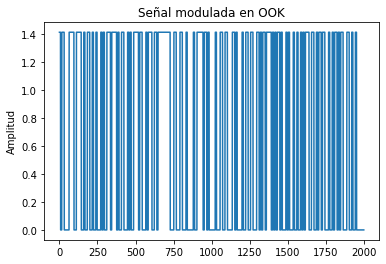

In [126]:
plt.title("Señal modulada en OOK")
plt.ylabel("Amplitud")
plt.plot(range(len(ook_vector[:2000])),ook_vector[:2000])
plt.show()

## NRZ
Para esta modulación el promedio de energía por bit es $E_{b} = A^2T$

In [127]:
A_nrz = np.sqrt((Eb)/T)


Se genera el escalamiento en la matriz NRZ, el cual no tendrá ningun cambio con la version de la pregunta N°3:

In [128]:
for i in range(len(bits)):
    if bits[i] == 0:
        nrz[i] = np.array([-1.0*A_nrz for i in range(8)])
    else:
        nrz[i] = np.array([1.0*A_nrz for i in range(8)])

Se vuelve a generar el vector NRZ para poder graficarlo

In [129]:
nrz_vector = []

for i in range(len(nrz)):
    for q in range(len(nrz[i])):
        nrz_vector.append(nrz[i][q])

Se graficó las primeras 2000 muestras a continuación:

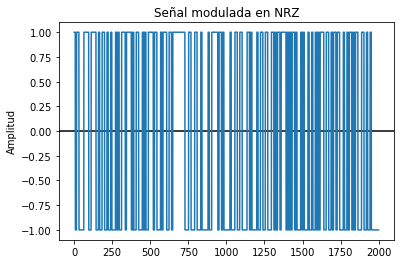

In [130]:
plt.title("Señal modulada en NRZ")
plt.ylabel("Amplitud")
plt.axhline(y=0, color='k')
plt.plot(range(len(nrz_vector[:2000])),nrz_vector[:2000])
plt.show()

## BPPM
Para esta modulación el promedio de energía por bit es $E_{b} = \frac{A^2 * \frac{1}{2} + A^2 * \frac{1}{2}}{2} $


In [131]:
A_bppm = np.sqrt(2*Eb)
A_bppm

1.4142135623730951

Se genera el escalamiento con A_bppm

In [132]:
for i in range(len(bits)):
    if bits[i] == 0:
        bppm[i] = np.array([1.0*A_bppm if i <= 3 else 0.0 for i in range(8)])
    else:
         bppm[i] = np.array([0.0 if i <= 3 else 1.0*A_bppm for i in range(8)])

Nuevamente para graficar se convirtió en un solo vector:

In [133]:
bppm_vector = []

for i in range(len(bppm)):
    for q in range(len(bppm[i])):
        bppm_vector.append(bppm[i][q])

Se graficó las primeras 700 muestras a continuación:

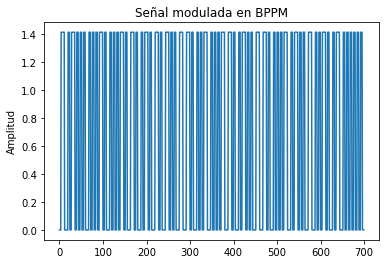

In [134]:
plt.title("Señal modulada en BPPM")
plt.ylabel("Amplitud")
plt.plot(range(len(bppm_vector[:700])),bppm_vector[:700])
plt.show()